# **더블 머신러닝(Double machine learning)**
* **작성자:** (이형돈)
---

## **논문:  Double/debiased machine learning for treatment and structural parameters(The Econometrics Journal,2018)**

기존의 회귀분석 방법들을 머신러닝에 단순하게 적용하면 정형화 편향(과적합을 막는 과정에서 생기는 편향) 처치 변수와 통제 변수 간의 상관관계에 결합하여 추정치를 왜곡하는 문제가 있다. 이를 해결하기 위한 방법으로 저자들은 더블 머신러닝을 제안한다. 더블 머신러닝의 핵심 아이디어는 첫 번째로 직교화를 통한 정형화 편향 극복방법이다. 이는 종속 변수 뿐만아니라 처치 변수에 미치는 통제 변수의 영향도 제거하는 방법이다. 두 번째는 과적합을 해결하기 위한 교차적합 방법이다. 이 방법은 데이터를 여러 개로 나누어 학습과 시험을 다른데이터로 교차 확인한다.

직교화의 목표는 방해 모수(통제변수X의 효과를 나타내는 알 수없는 함수ĝ₀(X) )를 추정할 때 생기는 편향이 처치 변수의 계수 추정치에 최대한 영향을 주지 않도록 만드는 것이다. 이를 설명하기 위해 나이만 직교성이라는 원리를 사용한다.


*   기존의 잘못된 접근: 종속 변수 Y에 대한 통제 변수 X의 효과만 제거하였다.$$Y의 잔차 = Y - (X로 예측한 Y)$$

*   DML의 직교화 접근: Y뿐만 아니, 처치변수 D에 대한 통제변수 X의 효과까지 제거하였다.$$Y의 잔차 = Y - (X로 예측한 Y) = Y - ĝ₀(X)$$
$$D의 잔차 = D - (X로 예측한 D) = D - m̂₀(X)$$

직교화가 정형화 편향을 해결하 위한 방법이였다면, 교차 적합은 데이터의 과적합을 해결하기 위한 방법이다. 만약 방해모수를 머신러닝으로 학습하는 과정과 최정족으로 세타제로를 추정하는 과정에서 같은 데이터를 쓰게된다면, 각 데이터 샘플의 오차항까지 학습해여 세타제로를 추정하게된다. 이 문제를 해결하기 위해 데이터를 k개로 나누어서 학습과 추정을 교대시킨다. k=2일때의 단순한 상황으로 예시를 들 수 있다.


1.   전체 데이터를 랜덤하게 절반으로 나누어 그룹A와 그룹B로 만든다.
2.   그룹A 데이터를 학습용으로 사용해 방해 모수를 추정한다. 그리고 이 학습된 모델을 그룹B 데이터를 사용해 세타제로의 첫 번째 추정치를 계산한다.
3.   이번에는 역할을 바꾸어 그룹B 데이터를 학습용으로 사용해 방해 모수를 다시 추정한다. 그리고 학습된 모델을 그룹A 데이터를 사용해 세타제로의 두 번째 추정치를 계산한다.
4.   2,3단계에서 추정한 세타제로의 평균을 구하여 최종 결과로 사용한다.

이 방법은 세타 제로를 추정할 때 모델이 한번도 접하지 않은 데이터를 사용하기 때문에 과적합 편향을 해결할 수 있다.


DML을 구현하는 첫 번째 방법으로 DML1이 있다. DML1의 핵심은 각 그룹마다 추정치를 구한 뒤, 그 결과들을 평균내는 것이다.

1.   먼저 데이터를 K개로 분할한다. 예를들어 K를 5개로 분할할 수 있다.
2.   각 그룹에 대해 각 그룹 K를 제외한 나머지 데이터를 활용하여 방해 모수를 예측하는 모델을 학습시켜 K개의 모델을 만든다.
3.   각 그룹 K마다, 2단계에서 K그룹을 제외하고 만든 모델을 적용하여 세타제로의 개별 추정치를 구한다.
4.   3단계에서 구한 K의 개별 추정치들을 산술 평균내여 최종 DML1 추정치를 얻는다.



DML을 구현하는 두 번째 방법으로 DML2가 있다. DML2의 핵심은 각 그룹의 방정식을 먼저 평균 낸 뒤, 추정치를 한 번만 구하는 것이다. 1&2단계는 DML1과 완전히 동일하다. 3단계부터 DML1과 차이가 발생하는데, 기존에는 각 그룹의 세타제로를 따로 구하였지만, DML2는 모든 그룹의 방정식을 하나로 합친 뒤 세타제로를 단 한번만 푼다.먼저 각 그룹 K에대해, 2단계에서 만든 모델을 K그룹 데이터에 적용하여 직교화된 방정식을 만든다. 이렇게 만들어진 방정식을 모두 더해 평균을 내어 단 하나의 최종 방정식을 만든다. 이 방정식을 풀어서 세타제로의 추정치를 한 번에 구한다. 저자들은 DML2가 더 안정적이기 때문에 더 선호된다고 주장한다.

DML이 추정한 세타제로의 추정치는 다음 두가지 통계적 성질을 가지므로 신뢰할 수 있다.

*  루트 N 일관성: 추정치가 매우 빠르게 실제 값에 가까워지는 것을 의미한다. 샘플데이터가 많아질수록 오차가 빠르게 줄어든다. 전통적인 머신러닝 기법에서는 보장되지 않는다.
*  점근적 정규: 샘플이 크면, 추정치의 분포가 정규분포를 따르게 된다.


다음으로 DML이 부분 선형 회귀 모형(PLR)에 어떻게 적용될 수 있는지 확인한다.
우리의 목표는 아래 모델에서 처치 효과 계수인 세타제로를 추정하는 것이다.


*   $Y = D\theta_0 + g_0(X) + U$
*   $D = m_0(X) + V$


DML알고리즘을 적용하기 위해서, 먼저 PLR모형에 알맞는 직교화된 방정식이 필요하다.
$$ψ:  (Y−Dθ−g(X))×(D–m(X))=0$$
첫 번째 괄호는 Y에서 처치효과와 통제변수 효과를 모두 제거한 나머지다.
두 번째 괄호는 D에서 통제변수 효과를 제거한 나머지다. 즉 DML은 D에서 X의 영향을 받은 부분을 제외하고 남은 순수한 부분이, Y에서 D와 X의 영향을 제외하고 남은 순수한 부분과 상관관계가 없도록 만드는 세타제로를 찾는것이다. 샘플 분할이 없는 기존의 고차원 분석 방법은 $g_0(X)$와 $m_0(X)$ 둘다 매우 단순해야만 정확한 예이 가능하였지만, DML은 둘 중 하나만이라도 단순하다면 정확한 예측이 가능하다.






DML은 부분 선형 도구 변수 모형(PLR-IV)에도 적용될 수 있다. 이전의 PLR모형은 처치 변수 D가 통제 변수 X를 조건으로 했을 때 외생적으로 가정하였지만, 현실에서는 D자체가 Y에 영향을 주는 다른 관측되지 않는 요인 내생성 문제가 발생할 수 있다. 이러한 내생성 문제를 해결하기 위해 도구 변수를 사용한다.PLR-IV모형에 말맞는 직교화된 방정식은 다음과 같다.
$$ψ=(Y - Dθ - g(X)) × (Z - m(X)) = 0$$ PLR모형의 방정식과의 차이점은 두번째 괄호에 있다. 처치 변수 D대신에 도구변수 Z에서 X의 효과를 제거한 부분을 사용하는 것이다. 이는 내생성이 있는 환경에서도 신뢰성있는 세타제로를 추정할 수 있게 해준다.

이전의 부분 선형 모형들은 처치 효과가 모든 사람들에게 동일하다고 가정하였지만, 현실에서는 개인의 특성에 따라 효과 다를 수 있다. 이러한 이질적 상황을 다루기 위해 평균 처치 효과(ATE)를 추정한다. 이는 모든 사람에게 처치 했을 때와 안했을 때의 평균적인 결과차이를 구하는 것이다. 이를 추정하기 위해 두가지 방해모수를 사용한다.


*   결과 예측 모델$g(D,X)$:주어진 D와 X에 대한 Y의 기댓값
*   처치 확률 모델$m(X)$:주어진 X에 대해 D=1일 확률(성향 점수)
ATE를 추정하기 위한 직교화된 방정식은 '이중으로 강건한' 형태를 사용합니다. 이 방식 또한 $g$와 $m$중 하나만 잘 추정되어도 최종 ATE 추정의 편향이 사라진다. DML은 추가적으로 두 모델의 추정 오차의 곱이 충분히 작기만 한다면 정확한 추론이 가능하게 한다.

국소 평균 처치 모형(LATE)은 도구 변수가 있을 때, 그 도구 변수에 의해서만 처치 여부가 바뀐 사람에게 나타나는 평균적인 처치효과를 구하는 것이다. 이를 추정하기 위해서는 ATE보다 더 많은 방해모수를 사용해야한다.
*   $μ₀(Z,X)$: Z와 X가 주어졌을 때 Y의 기댓값
*   $m₀(Z,X)$: Z와 X가 주어졌을 때 D의 기댓값
*   $p₀(X)$: X가 주어졌을 때 Z의 기댓값
LATE는 도구 변수 Z가 결과 Y에 미치는효과를 도구 변수 Z가 처치D에 미치는 효과로 나눈 값이다. LATE를 위한 DML방정식은 $(Z→Y 효과) - θ × (Z→D 효과) = 0$ 형태의 복합한 방정식으로 구성되어있다.

###실증 분석 예시1: 실업 보험 보너스의 효과

이 분석의 목적은 실업자에게 재취업 보너스를 지급하면 실업 기간이 줄어들까를 확인하는 것이다. 종속변수는 실업기간이고 처치변수는 보너스 프로그램에 할당되었는지다. 통제변수는 나이,성별등의 개인 특성이다.
결과는 보너스가 실업 기간을 통계적으로 유의미하게 감소시켯음이 확인되었다.
또한 방해 모수를 추정하는데 랜덤 포레스트, 라쏘 , 부스팅 등 어떤 머신러닝 방법을 쓰더라도 최종 결과는 동일하게 나왔다.



###실증 분석 예시2: 퇴직연금의 효과
이 분석의 목적은 퇴직연금 가입 자격또는 실제가입이 개인의 순금융자산을 늘리는 지를 확인하는 것이다. 종속변수는 순금융자산이고, 처치변수는 퇴직연금 가입 자격또는 실제 참여이다. 통제변수는 소득,나이,학력, 가족 수 등이 있다.
가입 자격의 효과를 보기 위해 ATE모형을, 실제 참여의 효과를 보기위해 LATE모형을 적용했다. 결과는 가입 자격과 실제 참여 모두 순금융자산을 늘리는 유의미한 효과가 있었다. 또한 여러가지 머신러닝 방법을 쓰더라도 결과는 대체로 일관적이였다.

###실증 분석 예시3:제도가 경제 성장에 미치는 영향
이 분석의 목적은 좋은 정치/경제 제도가 국가의 장기적인 경제 성장에 영향을 미치는가를 확인하는 것이다. 종속변수는 1인당 GDP이며, 처치변수는 제도의 질, 도구변수는 초기 유럽 정착민들의 사망률 그리고 통제변수는 적도부터의 거리와같은 지리역요인이다. 제도의 내생성 문제를 해결하기위해 부분 선형 도구 변수(PLR-IV)모형을 사용하였다. 결과는 제도의 질은 경제 성장에 유의미한 긍정적 효과를 가져왔다. 기존 연구와 유사한 결론이 나왔지만, 결과의 강건함이 높아졌다.

---
## **논문:  The cost of influence: How gifts to physicians shape prescriptions and drug costs(Journal of Health Economics,2024)**

미국 제약회사들은 의사들에게 식사,강연비 등 형태로 2020년에만 20억 달러(약2.6조)를 지불하였다. 이는 의료비 상승의 문제로 이어질 수 있기 때문에 여러 주에서 이러한 선물 금지법을 고려하고 있다. 기존 연구들은 선물을 받은 의사가 해당 약을 더 처방한다는 사실은 보여주었지만, 왜 그랬는지, 어떤 의사가 더 크게 반응하는지에 대한 근본적인 매커니즘은 잘 설명하지 못하였다. 따라서 이러한 매커니즘을 설명하기 위해 저자는 더블 머신러닝 방법론을 사용하여 전체 처방약 비용의 20%를 차지하는 당뇨병 치료제 시장 중심으로 분석한다.

이 연구는 공개 지불금 데이터(선물 데이터), 메디케어 파트D 데이터(처방 데이터), 두가지 데이터를 사용하였고, 사용된 주요 변수는 의사 개인 특성(성별,신규 의사 여부 등),의사의 환자 집단 특성(평균 연령, 건강 상태, 저소득층 의료 보조 수혜자 비율 등), 의사가 일하는 지역 특성, 의사의 네트워크 특성으로 4가지 그룹으로 나뉜다.

만약 수많은 통제 변수를 단순히 OLS회귀분석에 넣고 돌리면, 변수들 간의 복잡한 상관관계때문에 결과가 왜곡되고, 정확한 인과관계를 추론하기 힘들다. 이러한 문제점을 극복하기 위해 더블 머신러닝을 사용한다. 더블 머신러닝의 과정 3단계는 다음과 같다.


1.   제약회사가 어떤 의사에게 선물을 주는지를 예측한다. 머신러닝을 통해 통제변수로 선물을 예측하고 잔차를 구한다. 이 잔차는 의사들의 특성만으로는 설명되지 않는 순수한 선물의 양을 의미한다.
2.   이번엔 의사들의 처방량을 예측한다. 똑같은 통제 변수들을 사용해 브랜드 약 처방량을 예측하고, 잔차를 구한다. 이 잔차는 의사들의 특성만으로는 설명되지 않는 순수한 처방량을 의미한다.
3.   1단계의 순수한 선물이 2단계의 순수한 처방량에 어떤 영향을 미치는지 단순 회귀분석을 실행해 구한다.

이 과정을 통하여 다른 변수들의 영향을 걸러내고 오직 선물과 처방사이의 인과관계만을 추정할 수 있었다.



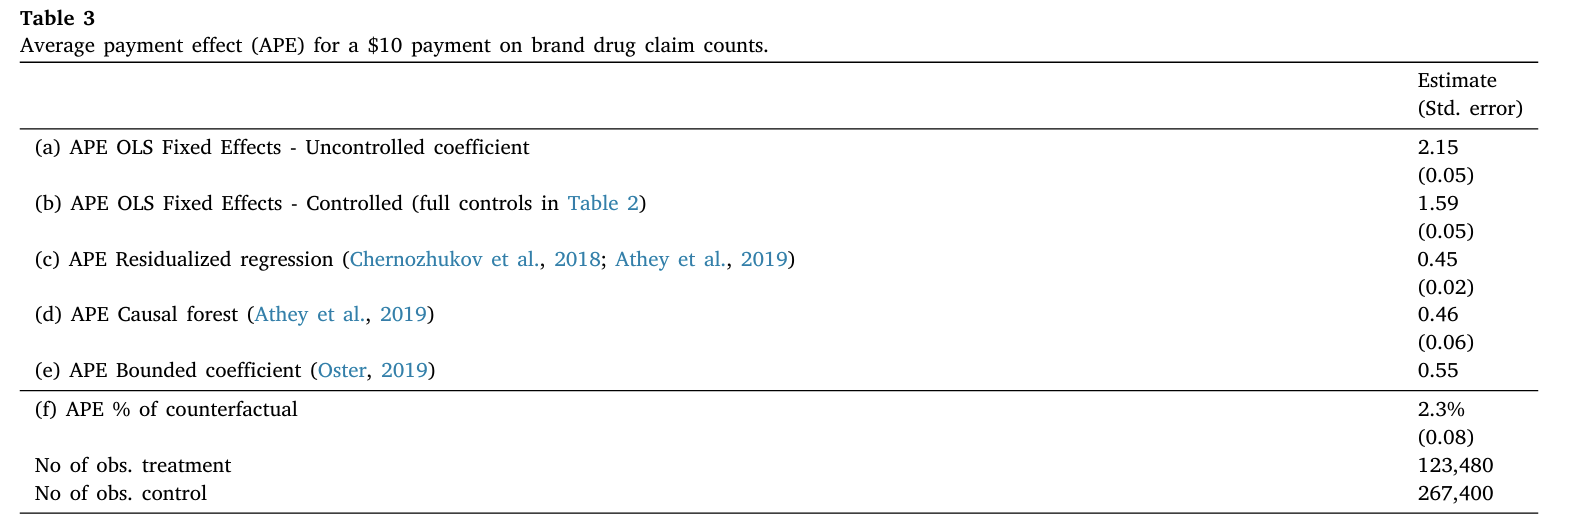

위의 Table 3는 연구의 결과를 요약한 것이다.

*   단순 비교를 하였을 경우 선물 받은 의사와 안 받은 의사를 그냥 비교한다면 선물 10달러당 브랜드 약 처방이 2.15건 증가한다.
*   일반적인 회귀분석(OLS)는 37개의 변수를 통제하자 효과가 1.59건으로 줄어든다. 이는 의사들의 특성 차이가 일부 영향을 미쳣다는 것을 의미한다.
*   더블 머신러닝을 적용하자 효과과 0.45건으로 대폭 감소한다. 논문은 이 수치가 진짜 인과효과라고 주장한다. 기존 OLS가 많은 편향을 포함하고 있었음을 알 수 있다.
*   다른 머신러닝 기법은 인과 포레스트를 사용한다면 더블 머신러닝과 0.46건으로 거의 동일한 결과가 나온다.

따라서 0.45건의 결과를 통해 제약 회사의 선물은 평균적으로 브랜드 약 처방을 2.3%증가시킨다는 결론이 나온다. 또한 공동지지 가정을 확인하였을 때, 선물을 받은 의사와 받지 않은 의사의 그룹의 특성 분포가 매우 유사하기 때문에 결과를 신뢰할 수 있다.



저자들은 추가적으로 유독 선물에 더 민감하게 반응하는 의사들이 있는지 확인한다. 이러한 이질적 효과를 분석하기 위해 인과 포레스트를 사용한다. 분석 결과 의사들의 수많은 특성 중 선물이 효과를 결정하는 가장 압도적인 변수는 저소득층 의료보조 수혜자(LIS) 비율이었다. LIS 환자 비율이 높은 의사는 선물에 훨씬 크게 반응하여 브랜드 약 처방을 늘렸다. 이 결과는 의사들이 처방을 할 때 환자가 부담할 약값을 고려한다는 결정적인 증거가된다. LIS 환자의 약값은 나라에서 지원해주기 때문에 의사 입장에서는 브랜드 약을 처방하는 것에 부담이 적어 제약회사의 선물에 더 쉽게 영향을 받게되는 것이다.

---
참고문헌
*   Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters.
*   Newham, M., & Valente, M. (2024). The cost of influence: how gifts to physicians shape prescriptions and drug costs. Journal of Health Economics, 95, 102887.